In [ ]:
# Set up environment by importing packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plot 
%matplotlib inline
import seaborn as sns
from datetime import date, timedelta 

In [ ]:
# Import your data
covid19 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
covid19

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
936738,2021-01-16,Sweetwater,Wyoming,56037.0,3280,26.0
936739,2021-01-16,Teton,Wyoming,56039.0,2614,4.0
936740,2021-01-16,Uinta,Wyoming,56041.0,1813,9.0
936741,2021-01-16,Washakie,Wyoming,56043.0,841,23.0


## **COVID 19 DATA**

**DATA WRANGLING**
- drop columns, rename columns, change index

In [ ]:
# Check for column names 
covid19.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [ ]:
# Drop unnecessary columns, fips not needed to look at cases and deaths 
drop_cols = ['fips']
covid19.drop(drop_cols, inplace = True, axis=1)
covid19

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
936738,2021-01-16,Sweetwater,Wyoming,3280,26.0
936739,2021-01-16,Teton,Wyoming,2614,4.0
936740,2021-01-16,Uinta,Wyoming,1813,9.0
936741,2021-01-16,Washakie,Wyoming,841,23.0


In [ ]:
# Rename columns to make it stand out more, changed to all capital letters
covid19 = covid19.rename(columns = {'date': 'DATE', 'county' : 'COUNTY', 'state':'STATE', 'cases': 'CASES', 'deaths': 'DEATHS'})
covid19

,DATE,COUNTY,STATE,CASES,DEATHS
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
936738,2021-01-16,Sweetwater,Wyoming,3280,26.0
936739,2021-01-16,Teton,Wyoming,2614,4.0
936740,2021-01-16,Uinta,Wyoming,1813,9.0
936741,2021-01-16,Washakie,Wyoming,841,23.0


In [ ]:
# Remove unnecessary column, by setting date to be the index
covid19 = covid19.set_index('DATE')
covid19

,COUNTY,STATE,CASES,DEATHS
DATE,,,,
2020-01-21,Snohomish,Washington,1,0.0
2020-01-22,Snohomish,Washington,1,0.0
2020-01-23,Snohomish,Washington,1,0.0
2020-01-24,Cook,Illinois,1,0.0
2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...
2021-01-16,Sweetwater,Wyoming,3280,26.0
2021-01-16,Teton,Wyoming,2614,4.0
2021-01-16,Uinta,Wyoming,1813,9.0


**NEW YORK STATE COVID 19 DATA**

In [ ]:
# Filter out information to only include the date, cases, deaths in state of New York (including all counties)
# Using .str.contains('New York') incase there are any mistakes, if spelling or capitalization is a bit off, it'll still count it - fuzzy matching
nys = covid19[covid19['STATE'].str.contains('New York')]
nys

,COUNTY,STATE,CASES,DEATHS
DATE,,,,
2020-03-01,New York City,New York,1,0.0
2020-03-02,New York City,New York,1,0.0
2020-03-03,New York City,New York,2,0.0
2020-03-04,New York City,New York,2,0.0
2020-03-04,Westchester,New York,9,0.0
...,...,...,...,...
2021-01-16,Washington,New York,1424,21.0
2021-01-16,Wayne,New York,3568,50.0
2021-01-16,Westchester,New York,82932,1780.0


In [ ]:
# Statistics on covid 19 data for New York State
nys.describe()

,CASES,DEATHS
count,17736.000000,17736.000000
mean,8122.357465,504.299729
std,35224.171128,2852.821297
min,0.000000,0.000000
25%,115.000000,2.000000
50%,377.000000,11.000000
75%,1932.500000,61.000000
max,524231.000000,25970.000000


In [ ]:
# Total covid 19 cases in New York State
total_casesNYS = nys['CASES'].sum()
total_casesNYS

144058132

In [ ]:
# Total covid 19 deaths in New York State
total_deathsNYS = nys['DEATHS'].sum()
total_deathsNYS

8944260.0

In [ ]:
# Average cases and deaths in New York State
nys.mean()

CASES     8122.357465
DEATHS     504.299729
dtype: float64

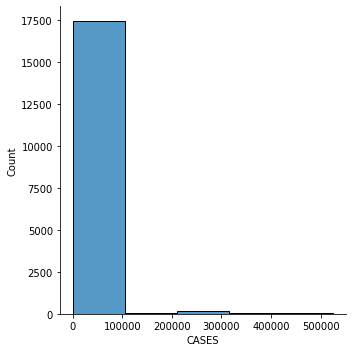

In [ ]:
# Visualization of cases in New York State
sns.displot(nys['CASES'], bins = 5)

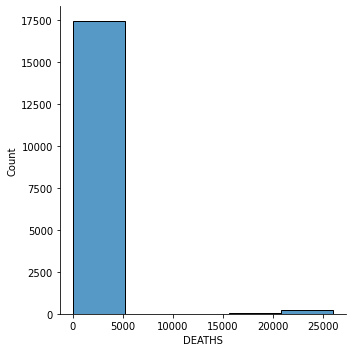

In [ ]:
# Visualization of deaths in New York State
sns.displot(nys['DEATHS'], bins = 5)

***NEW YORK STATE***

In total, New York State has had:  
*   144,058,132 cases of Covid 19
*   8,944,260 deaths due to Covid 19

In [ ]:
# Covid 19 data for last 30 days in New York State
# Set base as today's date, need today's date because you're looking for last 30 days from this day 
base = date.today()
# put our data into dataframe, named it results
nys30 = pd.DataFrame(columns=['COUNTY', 'STATE', 'CASES', 'DEATHS'])
# Loop through, start 30 days from today, stop at today's date
for x in range (-30,0):
  dates = base + datetime.timedelta(days=x)
  # If that date is found in nys, append entry to dataframe
  # Using index because we changed 'DATE' to index, so it's no longer a column
  entry = nys[nys.index.str.contains(str(dates))]
  nys30 = nys30.append(entry)
nys30

,COUNTY,STATE,CASES,DEATHS
2020-12-19,Albany,New York,8997,179.0
2020-12-19,Allegany,New York,1537,67.0
2020-12-19,Broome,New York,6938,186.0
2020-12-19,Cattaraugus,New York,2011,31.0
2020-12-19,Cayuga,New York,1953,14.0
...,...,...,...,...
2021-01-16,Washington,New York,1424,21.0
2021-01-16,Wayne,New York,3568,50.0
2021-01-16,Westchester,New York,82932,1780.0
2021-01-16,Wyoming,New York,2075,41.0


In [ ]:
# Total covid 19 cases in New York State for past 30 days
nys30_cases = nys30['CASES'].sum()
nys30_cases

29544545

In [ ]:
# Total covid 19 deaths in New York State for past 30 days
nys30_deaths = nys30['DEATHS'].sum()
nys30_deaths

1101033.0

In [ ]:
# Average covid 19 cases and deaths in New York State for past 30 days 
nys30.mean()

CASES     17565.127824
DEATHS      654.597503
dtype: float64

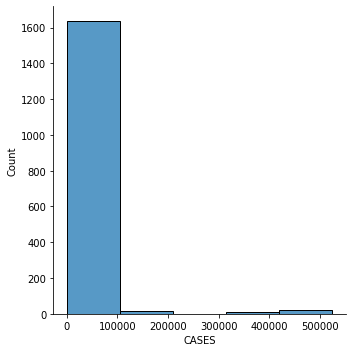

In [ ]:
# Visualization of cases in New York State for past 30 days 
sns.displot(nys30['CASES'], bins = 5)

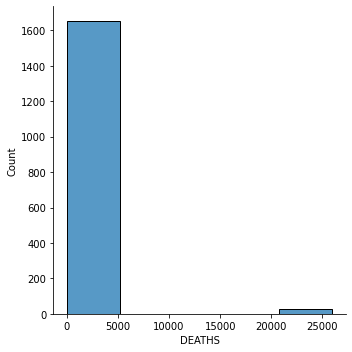

In [ ]:
# Visualization of deaths in New York State for past 30 days 
sns.displot(nys30['DEATHS'], bins = 5)

***NEW YORK STATE IN LAST 30 DAYS***

In the last 30 days, New York State has had:  
*   29,544,545 cases of Covid 19
*   1,101,033 deaths due to Covid 19


**NEW YORK CITY, NEW YORK COVID 19 DATA**

In [ ]:
# Further filter out -> state of New York and county of New York City
# Use .str.contains() for fuzzy matching
nyc = covid19[covid19['STATE'].str.contains('New York') & (covid19['COUNTY'].str.contains('New York City'))]
nyc

,COUNTY,STATE,CASES,DEATHS
DATE,,,,
2020-03-01,New York City,New York,1,0.0
2020-03-02,New York City,New York,1,0.0
2020-03-03,New York City,New York,2,0.0
2020-03-04,New York City,New York,2,0.0
2020-03-05,New York City,New York,4,0.0
...,...,...,...,...
2021-01-12,New York City,New York,498877,25698.0
2021-01-13,New York City,New York,504826,25741.0
2021-01-14,New York City,New York,510711,25834.0


In [ ]:
# Covid 19 statistics in New York City 
nyc.describe()

,CASES,DEATHS
count,322.000000,322.000000
mean,228868.745342,19820.326087
std,108776.700931,7645.980013
min,1.000000,0.000000
25%,199670.750000,20439.250000
50%,232394.000000,23577.500000
75%,265054.250000,23979.500000
max,524231.000000,25970.000000


In [ ]:
# Total covid 19 cases in New York City
total_casesNYC = nyc['CASES'].sum()
total_casesNYC

73695736

In [ ]:
# Total covid 19 deaths in New York City
total_deathsNYC = nyc['DEATHS'].sum()
total_deathsNYC

6382145.0

In [ ]:
# Average covid 19 cases and deaths in New York City
nyc.mean()

CASES     228868.745342
DEATHS     19820.326087
dtype: float64

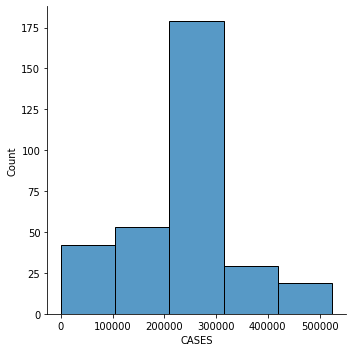

In [ ]:
# Visualization of cases in New York City
sns.displot(nyc['CASES'], bins = 5)

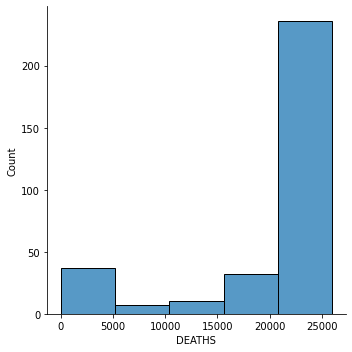

In [ ]:
# Visualization of deaths in New York City
sns.displot(nyc['DEATHS'], bins = 5)

***NEW YORK CITY***

In total, New York City has had:  
*   73,695,736 cases of Covid 19
*   6,382,145 deaths due to Covid 19

In [ ]:
# Covid 19 data in New York City for past 30 days
# Can use tail bc only focused on one county 
nyc30 = nyc.tail(30)
nyc30

,COUNTY,STATE,CASES,DEATHS
DATE,,,,
2020-12-18,New York City,New York,377728,24652.0
2020-12-19,New York City,New York,381067,24677.0
2020-12-20,New York City,New York,383808,24697.0
2020-12-21,New York City,New York,387595,24735.0
2020-12-22,New York City,New York,391634,24768.0
2020-12-23,New York City,New York,395810,24790.0
2020-12-24,New York City,New York,401251,24842.0
2020-12-25,New York City,New York,405857,24889.0
2020-12-26,New York City,New York,410048,24931.0


In [ ]:
# Sum of covid 19 cases in New York City for past 30 days
nyc30_cases = nyc30['CASES'].sum()
nyc30_cases

13298747

In [ ]:
# Sum of covid 19 deaths in New York City for past 30 days 
nyc30_deaths = nyc30['DEATHS'].sum()
nyc30_deaths

756579.0

In [ ]:
# Average covid 19 cases and deaths in New York City for past 30 days 
nyc30.mean()

CASES     443291.566667
DEATHS     25219.300000
dtype: float64

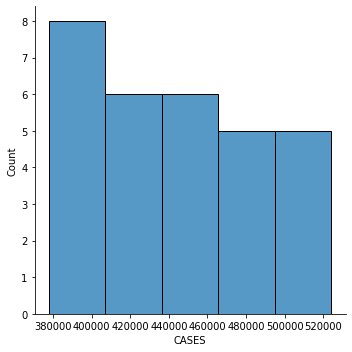

In [ ]:
# Visualization for covid 19 cases in New York City for past 30 days 
sns.displot(nyc30['CASES'], bins = 5)

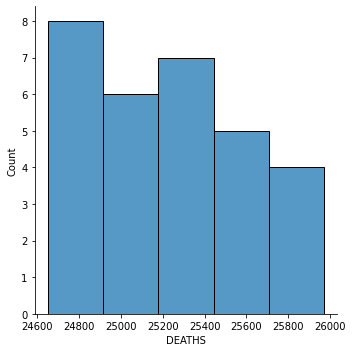

In [ ]:
# Visualization for covid 19 deaths in New York City for past 30 days 
sns.displot(nyc30['DEATHS'], bins = 5)

***NEW YORK CITY IN LAST 30 DAYS***

In the last 30 days, New York City has had:


*   13,298,747 cases of Covid 19
*   756,579 deaths due to Covid 19


**DATA FOR PASSAIC COUNTY IN NEW JERSEY**

In [ ]:
# Filter out Passaic County in New Jersey
# Use .str.contains() for fuzzy matching
pass_nj = covid19[covid19['STATE'].str.contains('New Jersey') & (covid19['COUNTY'].str.contains('Passaic'))]
pass_nj

,COUNTY,STATE,CASES,DEATHS
DATE,,,,
2020-03-08,Passaic,New Jersey,1,0.0
2020-03-09,Passaic,New Jersey,1,0.0
2020-03-10,Passaic,New Jersey,1,0.0
2020-03-11,Passaic,New Jersey,1,0.0
2020-03-12,Passaic,New Jersey,1,0.0
...,...,...,...,...
2021-01-12,Passaic,New Jersey,46104,1519.0
2021-01-13,Passaic,New Jersey,46517,1524.0
2021-01-14,Passaic,New Jersey,46888,1531.0


In [ ]:
# Statistics on covid 19 in Passaic County in New Jersey 
pass_nj.describe()

,CASES,DEATHS
count,315.000000,315.000000
mean,19219.406349,1017.688889
std,10594.296496,447.779125
min,1.000000,0.000000
25%,15800.000000,891.500000
50%,17895.000000,1244.000000
75%,21120.000000,1261.000000
max,47429.000000,1541.000000


In [ ]:
# Total cases in Passaic County in New Jersey 
total_casesNJ_Pass = pass_nj['CASES'].sum()
total_casesNJ_Pass

6054113

In [ ]:
# Total deaths in Passaic County in New Jersey 
total_deathsNJ_Pass = pass_nj['DEATHS'].sum()
total_deathsNJ_Pass

320572.0

In [ ]:
# Average covid 19 cases and deaths in Passaic County in New Jersey
pass_nj.mean()

CASES     19219.406349
DEATHS     1017.688889
dtype: float64

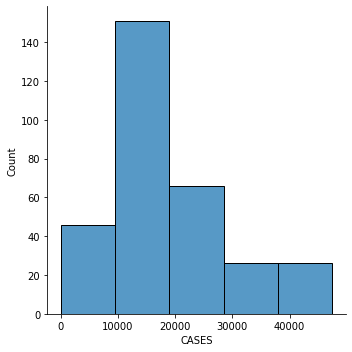

In [ ]:
# Visualization for covid 19 cases in passaic county in New Jersey
sns.displot(pass_nj['CASES'], bins = 5)

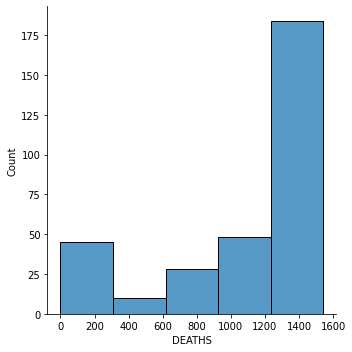

In [ ]:
# Visualization for covid 19 deaths in passaic county in New Jersey
sns.displot(pass_nj['DEATHS'], bins = 5)

***PASSAIC COUNTY IN NEW JERSEY***

In total, Passaic County in New York Jersey has had:  
*    6,054,113 cases of Covid 19
*    320,572 deaths due to Covid 19

In [ ]:
# Covid 19 data in Passaic County, New Jersey for past 30 days
# Can use tail bc only focused on one county 
pass_nj30 = pass_nj.tail(30)
pass_nj30

,COUNTY,STATE,CASES,DEATHS
DATE,,,,
2020-12-18,Passaic,New Jersey,37134,1388.0
2020-12-19,Passaic,New Jersey,37382,1391.0
2020-12-20,Passaic,New Jersey,37634,1392.0
2020-12-21,Passaic,New Jersey,37831,1395.0
2020-12-22,Passaic,New Jersey,37992,1407.0
2020-12-23,Passaic,New Jersey,38419,1418.0
2020-12-24,Passaic,New Jersey,38618,1424.0
2020-12-25,Passaic,New Jersey,38988,1426.0
2020-12-26,Passaic,New Jersey,39238,1426.0


In [ ]:
# Total covid 19 cases in Passaic County in New Jersey for past 30 days 
njpass30_cases = pass_nj30['CASES'].sum()
njpass30_cases

1256232

In [ ]:
# Total covid 19 deaths in Passaic County in New Jersey for past 30 days 
njpass30_deaths = pass_nj30['DEATHS'].sum()
njpass30_deaths 

43857.0

In [ ]:
# Average covid 19 cases and deaths in Passaic County in New Jersey for past 30 days 
pass_nj30.mean()

CASES     41874.4
DEATHS     1461.9
dtype: float64

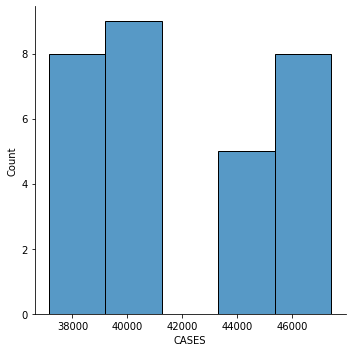

In [ ]:
# Visualization of cases in Passaic County in New Jersey for last 30 Days 
sns.displot(pass_nj30['CASES'], bins = 5)

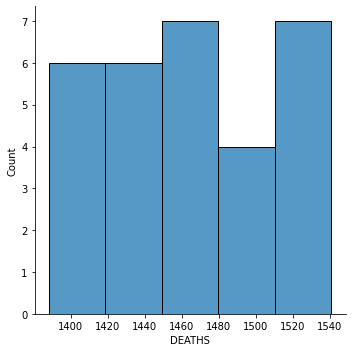

In [ ]:
# Visualization of deaths in Passaic County in New Jersey for last 30 Days
sns.displot(pass_nj30['DEATHS'], bins = 5)

***PASSAIC COUNTY IN NEW JERSEY IN LAST 30 DAYS***

In total, Passaic County in New York Jersey has had:  
*    1,256,232 cases of Covid 19
*    43,857 deaths due to Covid 19

***NEW YORK CITY, NEW YORK VS. PASSAIC COUNTY, NEW JERSEY***


In total, New York City has had:
*   67,641,623 more Covid 19 cases than Passaic County in New Jersey
*   6,061,573 more deaths than in Passaic County

In the last 30 days, New York City has had: 
*   12,042,515 cases than in Passaic County
*   712,722 more deaths than in Passaic County 


**DATA FOR PHILADELPHIA, PENNSYLVANIA**

In [ ]:
# Filter out Philadelphia in Pennsylvania 
# Use .str.contains() for fuzzy matching
phil_pa = covid19[covid19['STATE'].str.contains('Pennsylvania') & (covid19['COUNTY'].str.contains('Philadelphia'))]
phil_pa

,COUNTY,STATE,CASES,DEATHS
DATE,,,,
2020-03-10,Philadelphia,Pennsylvania,1,0.0
2020-03-11,Philadelphia,Pennsylvania,1,0.0
2020-03-12,Philadelphia,Pennsylvania,1,0.0
2020-03-13,Philadelphia,Pennsylvania,3,0.0
2020-03-14,Philadelphia,Pennsylvania,4,0.0
...,...,...,...,...
2021-01-12,Philadelphia,Pennsylvania,100910,2645.0
2021-01-13,Philadelphia,Pennsylvania,101582,2671.0
2021-01-14,Philadelphia,Pennsylvania,102168,2693.0


In [ ]:
# Statistics on covid 19 in Philadelphia, Pennsylvania 
phil_pa.describe()

In [ ]:
# Total covid 19 cases in Philadelphia, Pennsylvania 
phil_pa_cases = phil_pa['CASES'].sum()
phil_pa_cases

In [ ]:
# Total covid 19 deaths in Philadelphia, Pennsylvania 
phil_pa_deaths = phil_pa['DEATHS'].sum()
phil_pa_deaths

In [ ]:
# Average covid 19 cases and deaths in Philadelphia, Pennsylvania 
phil_pa.mean()

In [ ]:
# Visualization of covid 19 cases in Philadelphia, Pennsylvania 
sns.displot(phil_pa['CASES'], bins = 5)

In [ ]:
# Visualization of covid 19 deaths in Philadelphia, Pennsylvania 
sns.displot(phil_pa['DEATHS'], bins = 5)

***PHILADELPHIA, PENNSYLVANIA***

In total, Philadelphia, Pennsylvania has had:  
*    11,540,015 cases of Covid 19
*    470,653 deaths due to Covid 19

In [ ]:
# Covid 19 data in Philadelphia, Pennsylvania for past 30 days
# Can use tail bc only focused on one county 
phil_pa30 = phil_pa.tail(30)
phil_pa30

In [ ]:
# Total covid 19 cases in Philadelphia,Pennsylvania for last 30 days
phil_pa30_cases = phil_pa30['CASES'].sum()
phil_pa30_cases

In [ ]:
# Total covid 19 deaths in Philadelphia,Pennsylvania for last 30 days
phil_pa30_deaths = phil_pa30['DEATHS'].sum()
phil_pa30_deaths

In [ ]:
# Average covid 19 cases and deaths in Philadelphia,Pennsylvania for last 30 days
phil_pa30.mean()

In [ ]:
# Visualization of cases in Philadelphia,Pennsylvania for last 30 days
sns.displot(phil_pa30['CASES'], bins = 5)

In [ ]:
# Visualization of deaths in Philadelphia,Pennsylvania for last 30 days
sns.displot(phil_pa30['DEATHS'], bins = 5)

***PHILADELPHIA, PENNSYLVANIA IN THE LAST 30 DAYS***

In the last 30 days, Philadelphia, Pennsylvania has had:  
*    2,826,716 cases of Covid 19
*    74,641 deaths due to Covid 19

***PASSAIC COUNTY, NEW JERSEY VS. PHILADELPHIA, PENNSYLVANIA***

In total Philadelphia, Pennsylvania has had: 

*   5,485,902 more Covid 19 cases than in Passaic Couny in New Jersey
*   150,081 more deaths than in Passaic County 

In the last 30 days, Philadelphia, Pennsylvania has had: 

*   1,570,484 more Covid 19 cases than in Passaic Couny in New Jersey
*   30,784 more deaths than in Passaic County 


***NEW YORK CITY, NEW YORK VS. PHILADELPHIA, PENNSYLVANIA***

Overall, New York City has had the most cases and deaths for Covid 19. Second, was Philadelphia, Pennsylvania. Passaic County in New Jersey had the least number of cases and deaths between the three. 

Within the last 30 days, New York City continued to have the most cases and deaths for Covid 19. Philadephia, Pennsylvania remained second. Passaic County in Jersey had the least number of cases and deaths between the three. 